In [3]:
import numpy as np
import pandas as pd
import math
import progressbar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Classification

In [2]:
import pyodbc

In [7]:
servername = 'VICKEYS\SQLEXPRESS'
database   = 'USDA_test'

myconnect = pyodbc.connect('Driver= {SQL Server};Server='+servername+';Database = '+database+';Trusted_connection=yes')

In [10]:
query = 'SELECT * FROM [USDA_test].[dbo].[DIM_TotalNutrition]' 

df = pd.read_sql(query,myconnect)
df.head()

,FoodCode,TotalSugars(g),TotalDietaryFibre(g),TotalFat(g),VitaminC(mg),VitaminD(mcg),VitaminE(mg),Calcium(mg),Iron(mg),Caffeine(mg),Alcohol(g),Water(g)
0,11000000.0,6.89,0.0,4.38,5.0,0.1,0.08,32.0,0.03,0.0,0.0,87.50
1,11100000.0,5.08,0.0,2.04,0.1,1.2,0.04,119.0,0.03,0.0,0.0,89.13
2,11111000.0,5.05,0.0,3.25,0.0,1.3,0.07,113.0,0.03,0.0,0.0,88.13
3,11111100.0,4.46,0.0,3.46,0.9,1.3,0.08,101.0,0.05,0.0,0.0,88.20
4,11111150.0,5.05,0.0,3.25,0.0,1.3,0.07,113.0,0.03,0.0,0.0,88.13


In [11]:
df1 = df.copy()
df1.head(10)

,FoodCode,TotalSugars(g),TotalDietaryFibre(g),TotalFat(g),VitaminC(mg),VitaminD(mcg),VitaminE(mg),Calcium(mg),Iron(mg),Caffeine(mg),Alcohol(g),Water(g)
0,11000000.0,6.89,0.0,4.38,5.0,0.1,0.08,32.0,0.03,0.0,0.0,87.50
1,11100000.0,5.08,0.0,2.04,0.1,1.2,0.04,119.0,0.03,0.0,0.0,89.13
2,11111000.0,5.05,0.0,3.25,0.0,1.3,0.07,113.0,0.03,0.0,0.0,88.13
3,11111100.0,4.46,0.0,3.46,0.9,1.3,0.08,101.0,0.05,0.0,0.0,88.20
4,11111150.0,5.05,0.0,3.25,0.0,1.3,0.07,113.0,0.03,0.0,0.0,88.13
5,11111160.0,5.20,0.0,0.97,0.0,1.2,0.01,125.0,0.03,0.0,0.0,89.92
6,11111170.0,4.85,0.0,0.18,1.0,1.2,0.01,204.0,0.04,0.0,0.0,90.80
7,11112110.0,5.06,0.0,1.98,0.2,1.2,0.03,120.0,0.02,0.0,0.0,89.21
8,11112120.0,5.20,0.0,0.97,0.0,1.2,0.01,125.0,0.03,0.0,0.0,89.92
9,11112130.0,5.06,0.0,1.98,0.2,1.2,0.03,120.0,0.02,0.0,0.0,89.21


In [1]:
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression()

In [5]:
idata = pd.read_csv('insurance.csv')
idata.head()


,age,bought_insurance,Unnamed: 2
0,22,0,NaN
1,25,0,NaN
2,47,1,NaN
3,52,0,NaN
4,46,1,NaN


In [6]:
idata.drop(columns=['Unnamed: 2'], axis=1, inplace =True)
idata

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


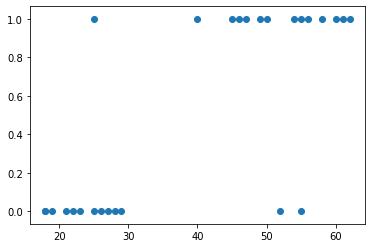

In [7]:
plt.scatter(idata['age'],idata['bought_insurance'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(idata[['age']],idata['bought_insurance'], test_size = 0.2)

In [10]:
X_train.head()

,age
8,62
9,61
1,25
5,56
22,40


In [28]:
y_train

18    0
23    1
5     1
11    0
21    0
22    1
0     0
2     1
19    0
10    0
1     0
9     1
24    1
4     1
26    0
20    0
16    1
8     1
6     0
3     0
25    1
Name: bought_insurance, dtype: int64

In [30]:
Logit.fit(X_train,y_train)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
Logit.predict([[70]])

array([1], dtype=int64)

In [13]:
Logit.score(X_test,y_test)

0.8333333333333334

In [15]:
Logit.predict_proba(X_test)

array([[0.238206  , 0.761794  ],
       [0.21214067, 0.78785933],
       [0.5824298 , 0.4175702 ],
       [0.61828744, 0.38171256],
       [0.54567886, 0.45432114],
       [0.55800505, 0.44199495]])

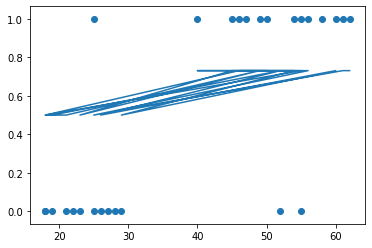

In [26]:
plt.scatter(idata['age'],idata['bought_insurance'])
def sigmoid(x):
    return 1. / (1. + np.exp(-x))
plt.plot(X_train,sigmoid(Logit.predict(X_train)))

In [32]:
hr  = pd.read_csv('HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [17]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [51]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
from sklearn.datasets import load_digits

In [35]:
digits = load_digits()

In [36]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [37]:
len(digits.data)

1797

In [38]:
digits.data[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

<Figure size 432x288 with 0 Axes>

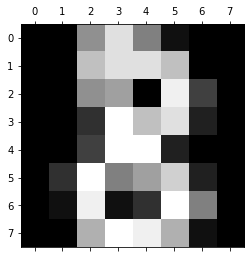

In [9]:
plt.gray()
plt.matshow(digits.images[8])

In [10]:
X_train, X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [11]:
len(X_train)

1437

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
Logit1 = LogisticRegression()
Logit1.fit(X_train,y_train)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
Logit1.predict([digits.data[88]])

array([6])

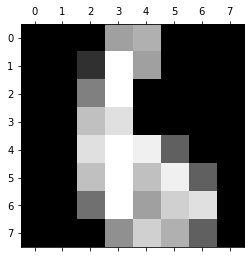

In [16]:
plt.matshow(digits.images[88])

In [17]:
y_pred = Logit1.predict(X_test)
y_pred

array([1, 7, 2, 7, 2, 9, 4, 1, 5, 9, 2, 1, 7, 5, 9, 2, 4, 6, 7, 6, 8, 1,
       4, 1, 3, 2, 6, 3, 4, 1, 4, 0, 7, 8, 6, 4, 8, 1, 1, 2, 4, 9, 1, 4,
       1, 2, 5, 3, 4, 2, 7, 8, 7, 0, 5, 8, 4, 6, 1, 5, 2, 0, 5, 1, 1, 2,
       7, 5, 9, 3, 1, 3, 4, 5, 9, 3, 0, 7, 3, 6, 1, 9, 6, 7, 7, 2, 2, 0,
       7, 8, 3, 2, 5, 1, 0, 5, 6, 8, 4, 3, 4, 0, 7, 8, 9, 8, 4, 9, 5, 2,
       2, 6, 7, 0, 6, 9, 9, 4, 5, 5, 6, 3, 9, 9, 2, 4, 3, 3, 6, 5, 8, 1,
       8, 9, 9, 4, 7, 4, 3, 4, 5, 3, 3, 9, 1, 0, 1, 1, 7, 1, 4, 6, 0, 7,
       7, 9, 6, 1, 7, 6, 1, 8, 4, 9, 4, 5, 7, 5, 1, 3, 1, 1, 7, 5, 9, 7,
       6, 9, 8, 3, 5, 9, 6, 5, 3, 9, 2, 4, 0, 0, 1, 2, 6, 6, 1, 4, 2, 3,
       8, 4, 8, 6, 5, 8, 5, 6, 2, 0, 1, 0, 1, 2, 2, 8, 9, 9, 7, 1, 3, 5,
       8, 8, 2, 8, 3, 5, 7, 7, 3, 9, 0, 0, 2, 2, 9, 0, 7, 6, 5, 1, 2, 6,
       3, 9, 0, 0, 3, 8, 9, 7, 9, 8, 0, 4, 0, 5, 9, 3, 1, 3, 2, 4, 6, 9,
       5, 4, 9, 5, 4, 2, 9, 4, 0, 3, 4, 4, 5, 6, 1, 0, 2, 6, 2, 1, 7, 6,
       5, 1, 6, 7, 6, 7, 7, 9, 8, 6, 8, 3, 2, 3, 1,

In [18]:
from sklearn.metrics import confusion_matrix
confM = confusion_matrix(y_test,y_pred)
confM

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 37,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 38,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  1, 33,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 41]], dtype=int64)

In [19]:
import seaborn as sns

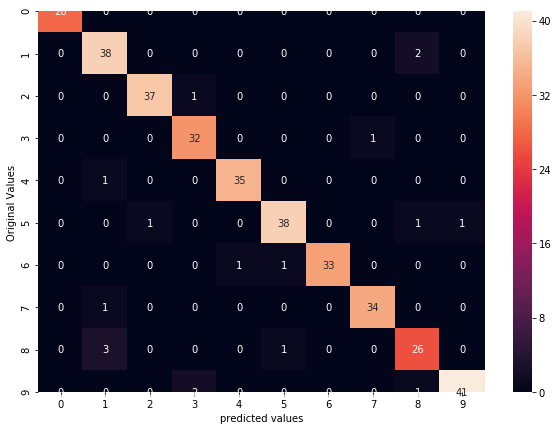

In [28]:
%matplotlib inline
#fig, ax = plt.subplots(1, 1, figsize=(15, 7))
#sns.heatmap(df_train.corr(), vmax=1, vmin=-1, center=0, annot=True, ax=ax)
plt.figure(figsize=(10,7))
#plt
sns.heatmap(confM,annot=True)
plt.xlabel('predicted values')
plt.ylabel('Original Values')
#plt.xticks([0,1,2,3,4,5,6,7,8,9])
#plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

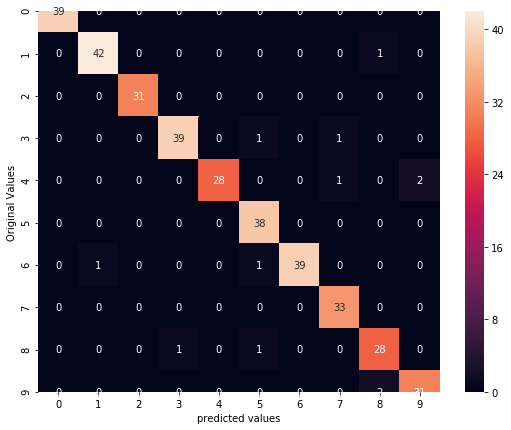

In [32]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.figure(figsize=(9,7))
sns.heatmap(confM,annot=True)
plt.xlabel('predicted values')
plt.ylabel('Original Values')
#plt.xticks([0,1,2,3,4,5,6,7,8,9])
#plt.yticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

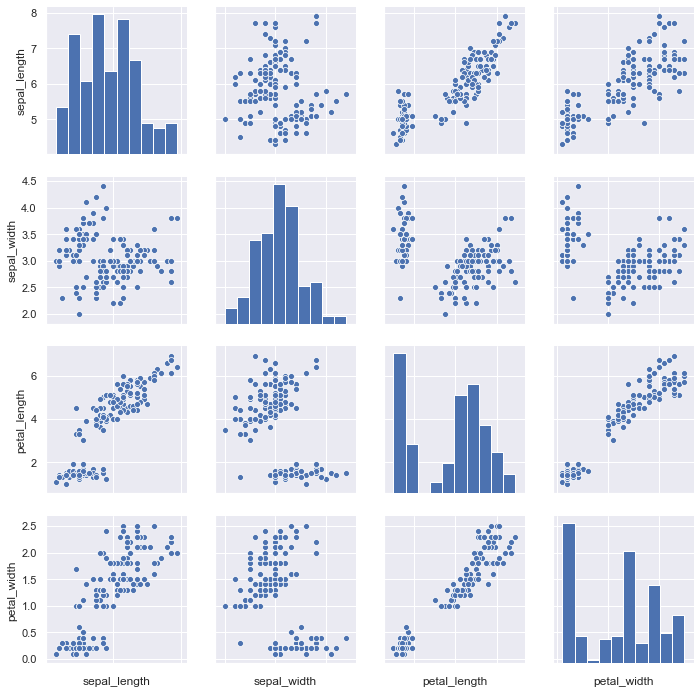

In [117]:
import seaborn as sns
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)
g.set(xticklabels=[])

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris

In [40]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [35]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [36]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [132]:
iris.filename

'C:\\Users\\alevi\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [137]:
len(iris.target)

150

In [134]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [136]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.2)

In [45]:
X_train

array([[7.1, 3. , 5.9, 2.1],
       [7.7, 2.8, 6.7, 2. ],
       [5. , 3.6, 1.4, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5.6, 3. , 4.1, 1.3],
       [6.4, 3.2, 4.5, 1.5],
       [5. , 3.3, 1.4, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [5.7, 2.9, 4.2, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.1, 3.5, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 3. , 6.1, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [4.9, 2.4, 3.3, 1. ],
       [5.5, 3.5, 1.3, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [7.6, 3. , 6.6, 2.1],
       [5.1, 3.8, 1.6, 0.2],
       [5. , 3. , 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.3, 3

In [46]:
irisModel = LogisticRegression()
irisModel.fit(X_train,y_train)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
irisModel.predict([[5.3,3,4.6,1]])

array([1])

In [48]:
irisModel.predict(X_test)

array([2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0])

In [49]:
accuracy = irisModel.score(X_test,y_test)
print("Accuracy is {}".format(accuracy))

Accuracy is 0.9666666666666667


In [155]:
chd = pd.read_csv('framinghamtrain.csv')
chd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,44,2.0,1,40.0,0.0,0,0,0,232.0,125.0,86.0,23.23,72,80.0,0
1,1,51,4.0,0,0.0,0.0,0,1,0,200.0,115.0,76.0,31.04,78,NaN,1
2,0,55,3.0,1,20.0,0.0,0,0,1,216.0,125.0,80.0,27.18,86,244.0,0
3,1,48,2.0,1,20.0,0.0,0,1,0,258.0,150.0,105.0,25.94,83,60.0,0
4,1,64,1.0,0,0.0,0.0,0,0,0,185.0,94.0,62.0,26.11,70,68.0,0


In [156]:
len(chd)

1240

In [157]:
chd.isna().sum()

male                 0
age                  0
education           30
currentSmoker        0
cigsPerDay          14
BPMeds              13
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             12
sysBP                0
diaBP                0
BMI                  2
heartRate            0
glucose            106
TenYearCHD           0
dtype: int64

In [158]:
chd = chd.dropna(axis=0,how='any')
len(chd)

1081

In [153]:
chd.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [159]:
chd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,44,2.0,1,40.0,0.0,0,0,0,232.0,125.0,86.0,23.23,72,80.0,0
2,0,55,3.0,1,20.0,0.0,0,0,1,216.0,125.0,80.0,27.18,86,244.0,0
3,1,48,2.0,1,20.0,0.0,0,1,0,258.0,150.0,105.0,25.94,83,60.0,0
4,1,64,1.0,0,0.0,0.0,0,0,0,185.0,94.0,62.0,26.11,70,68.0,0
5,0,53,1.0,1,20.0,0.0,0,1,0,181.0,163.5,87.0,34.69,80,71.0,0


In [160]:
chd_corr = chd.corr()
chd_corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.000701,0.028814,0.180896,0.291494,-0.075130,-0.036411,0.000762,-0.001559,-0.093920,-0.033739,0.043336,0.053418,-0.141050,-0.024542,0.095670
age,-0.000701,1.000000,-0.138077,-0.218957,-0.203438,0.195968,0.069105,0.310943,0.101842,0.252251,0.382780,0.206357,0.137991,-0.026485,0.101479,0.258253
education,0.028814,-0.138077,1.000000,0.002493,0.009004,-0.033335,-0.043658,-0.093305,-0.022702,-0.009621,-0.101899,-0.057008,-0.144195,-0.044834,-0.004334,-0.041517
currentSmoker,0.180896,-0.218957,0.002493,1.000000,0.774866,-0.057592,-0.062194,-0.098218,-0.025731,-0.020893,-0.130606,-0.103481,-0.159675,0.057069,-0.041128,0.001990
cigsPerDay,0.291494,-0.203438,0.009004,0.774866,1.000000,-0.065254,-0.061300,-0.070164,-0.023131,-0.020243,-0.102809,-0.066260,-0.120623,0.082279,-0.038235,0.015885
BPMeds,-0.075130,0.195968,-0.033335,-0.057592,-0.065254,1.000000,0.238042,0.265986,0.048558,0.110303,0.324134,0.227113,0.140269,0.019486,0.076972,0.152316
prevalentStroke,-0.036411,0.069105,-0.043658,-0.062194,-0.061300,0.238042,1.000000,0.106019,-0.019353,0.001416,0.089642,0.064861,0.078898,-0.047375,-0.014752,0.060310
prevalentHyp,0.000762,0.310943,-0.093305,-0.098218,-0.070164,0.265986,0.106019,1.000000,0.112985,0.197130,0.705975,0.613056,0.317954,0.168641,0.114113,0.201734
diabetes,-0.001559,0.101842,-0.022702,-0.025731,-0.023131,0.048558,-0.019353,0.112985,1.000000,0.024621,0.117753,0.063243,0.103688,0.079025,0.644463,0.059940
totChol,-0.093920,0.252251,-0.009621,-0.020893,-0.020243,0.110303,0.001416,0.197130,0.024621,1.000000,0.261007,0.243613,0.148994,0.084942,0.039477,0.097630


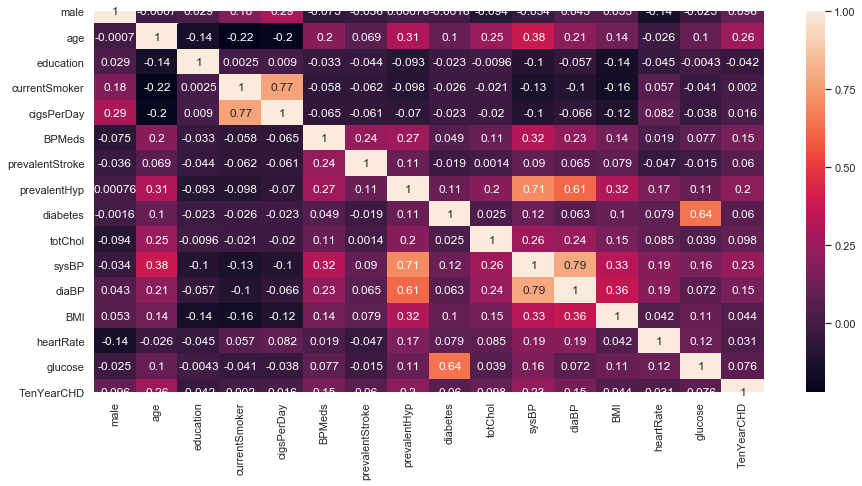

In [162]:
plt.figure(figsize=(15,7))
sns.heatmap(chd_corr,annot=True)
plt.show()

In [164]:
chd.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [165]:
X = chd[['age','cigsPerDay','prevalentStroke','prevalentHyp','totChol','sysBP','BMI']]
y = chd['TenYearCHD']

In [166]:
chdModel = LogisticRegression()
chdModel.fit(X,y)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
chdModel.predict([[40,10,1,1,230,120,26]])

array([0], dtype=int64)

In [170]:
chdpred = pd.read_csv('framingham3.csv')
chdpred

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,57,4.0,0,0.0,0.0,0,0,0,160.0,105.0,70.0,27.01,52.0,61.0,0
1496,0,40,3.0,1,15.0,0.0,0,0,0,304.0,121.0,88.0,22.52,60.0,80.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1498,0,43,3.0,1,20.0,0.0,0,0,0,232.0,122.0,70.0,23.09,67.0,77.0,0


In [172]:
chdpred.isna().sum()

male                 0
age                  0
education           44
currentSmoker        0
cigsPerDay           7
BPMeds              19
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             18
sysBP                0
diaBP                0
BMI                  5
heartRate            1
glucose            128
TenYearCHD           0
dtype: int64

In [173]:
chdpred = chdpred.dropna(axis=0,how='any')
chdpred

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,58,2.0,1,3.0,0.0,0,0,0,242.0,123.0,69.0,23.38,74.0,72.0,0
1495,0,57,4.0,0,0.0,0.0,0,0,0,160.0,105.0,70.0,27.01,52.0,61.0,0
1496,0,40,3.0,1,15.0,0.0,0,0,0,304.0,121.0,88.0,22.52,60.0,80.0,0
1498,0,43,3.0,1,20.0,0.0,0,0,0,232.0,122.0,70.0,23.09,67.0,77.0,0


In [175]:
chdtest = chdpred[['age','cigsPerDay','prevalentStroke','prevalentHyp','totChol','sysBP','BMI']]
chdtest

,age,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,BMI
0,39,0.0,0,0,195.0,106.0,26.97
1,46,0.0,0,0,250.0,121.0,28.73
2,48,20.0,0,0,245.0,127.5,25.34
3,61,30.0,0,1,225.0,150.0,28.58
4,46,23.0,0,0,285.0,130.0,23.10
...,...,...,...,...,...,...,...
1494,58,3.0,0,0,242.0,123.0,23.38
1495,57,0.0,0,0,160.0,105.0,27.01
1496,40,15.0,0,0,304.0,121.0,22.52
1498,43,20.0,0,0,232.0,122.0,23.09


In [193]:
result = chdModel.predict(chdtest)
result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
rlt = pd.DataFrame(result)
rlt

,0
0,0
1,0
2,0
3,0
4,0
...,...
1294,0
1295,0
1296,0
1297,0


In [191]:
rlt.count()

0    1299
dtype: int64

## DECISION TREE CLASSIFIER

In [50]:
ss = pd.read_csv('salaries.csv')
ss

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [51]:
X = ss[['company','job','degree']]
y = ss['salary_more_then_100k']

In [52]:
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [53]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [54]:
X['company'] = lb.fit_transform(X['company'])
X['job'] = lb.fit_transform(X['job'])
X['degree'] = lb.fit_transform(X['degree'])

C:\Users\alevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\alevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [55]:
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [204]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [56]:
from sklearn import tree

In [57]:
trob = tree.DecisionTreeClassifier()

In [58]:
trob.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
trob.predict([[2,1,1]])

array([1], dtype=int64)

In [60]:
trob.score(X,y)

1.0

In [61]:
tt = pd.read_csv('titanic.csv')
tt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [253]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [254]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
tt['Sex'] = tt['Sex'].astype('category')

In [63]:
tt['Sex'] = tt['Sex'].cat.codes
tt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [260]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [263]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [261]:
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [69]:
tt = tt.fillna({'Age': int(tt['Age'].mean())})

In [262]:
tt = tt.fillna({'Age': int(tt['Age'].median())})

In [264]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [70]:
training = tt[['Pclass','Sex','Age','Fare']]
target  = tt['Survived']

In [71]:
X_train, X_test,y_train,y_test = train_test_split(training,target,test_size = 0.2)

In [72]:
len(X_train)

712

In [73]:
len(X_test)

179

In [74]:
trob.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
## mean as substitute

trob.score(X_test,y_test)

0.776536312849162

In [76]:
## median as substitute for missing values

trob.score(X_test,y_test)

0.776536312849162

In [77]:
len(X_train)


712

In [78]:
y_train

198    1
596    1
471    0
579    1
659    0
      ..
218    1
316    1
858    1
602    0
766    0
Name: Survived, Length: 712, dtype: int64

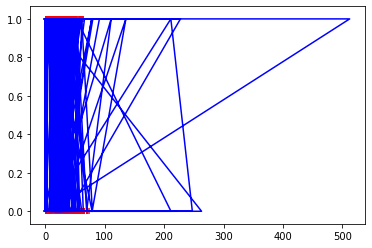

In [81]:
plt.scatter(X_train.Age,y_train,color = 'red', marker='+')
plt.plot(X_test,trob.predict(X_test),color='blue')

In [82]:
trob.predict([[1,1,28,60]])

array([1], dtype=int64)

## SUPPORT VECTOR MACHINES

#### SVM allows us to avoid misclassification of the groups and maximizing the margin , the datapoints close to the boundary line are called Support Vectors and hence the name SVM.

#### The line with greater margin is better because it is used to classify the groups in a  much better way between the nearby datapoints and the line itself 

#### SVM draws a hyper-plane in a n-dimensional space in such a way that it maximized the margin between the classification groups

In [83]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
df['flowernames'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowernames
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [87]:
df0  = df[df.target==0]
df1  = df[df.target==1]
df2  = df[df.target==2]

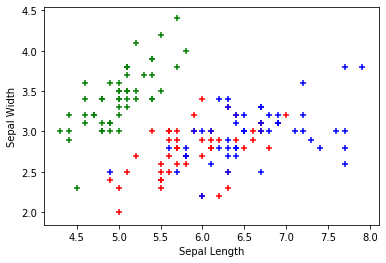

In [93]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'red', marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color = 'blue', marker = '+')

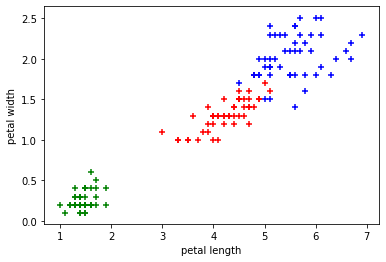

In [94]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'red', marker = '+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color = 'blue', marker = '+')

In [95]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowernames
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [96]:
X = df.drop(columns=['target','flowernames'],axis=1)

In [97]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [99]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)

In [128]:
from sklearn.svm import SVC
svm = SVC(C=100,gamma=10)

In [129]:
svm.fit(Xtrain,ytrain)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
svm.score(Xtest,ytest)

0.9333333333333333

In [131]:
numbers  = load_digits()

In [133]:
dir(numbers)

['DESCR', 'data', 'images', 'target', 'target_names']

In [135]:
numbers.

array([0, 1, 2, ..., 8, 9, 8])

In [136]:
X = numbers.data
y = numbers.target

In [138]:
y[0:5]

array([0, 1, 2, 3, 4])

In [139]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2)

In [140]:
Xtrain

array([[ 0.,  0.,  6., ...,  9.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  6., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  2.,  0.],
       [ 0.,  0.,  6., ...,  1.,  0.,  0.]])

In [141]:
ytrain

array([9, 9, 9, ..., 8, 1, 9])

In [164]:
ssvv = SVC(kernel='linear', C = 10 , gamma=1)

In [165]:
ssvv.fit(Xtrain,ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
rbf = ssvv.score(Xtest,ytest)
print('rbf score is',rbf)

rbf score is 0.4666666666666667


In [166]:
lm = ssvv.score(Xtest,ytest)
print('Linear kernel score is',lm)

Linear kernel score is 0.9805555555555555


In [ ]:
ssvv.score(Xtest,ytest)

In [ ]:
ssvv.score(Xtest,ytest)

## RANDOM FOREST

#### Take a single data set and build multiple decision trees, dividing the datasets into batch of multiple datasets with each having their own decision tree with a prediction , then you take the majority vote of all decision trees and produce your final result.

In [167]:
X = numbers.data
y = numbers.target

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
 Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2) 

In [184]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
rfc.score(Xtest,ytest)

0.975

In [186]:
y_pred = rfc.predict(Xtest)

In [187]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 33]], dtype=int64)

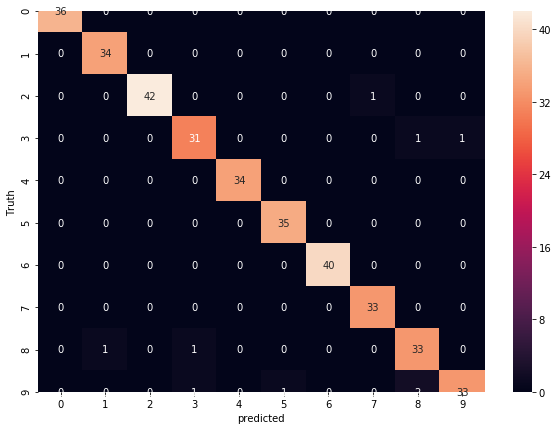

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

#### Exercise 

In [190]:
X = iris.data
y = iris.target

In [191]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2. str)

In [192]:
len(Xtrain)

120

In [202]:
irisRFC = RandomForestClassifier(n_estimators=50)
irisRFC.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
irisRFC.score(Xtest,ytest)

0.9666666666666667

### CROSS - VALIDATION

### It  is a technique which allows or helps us to choose which model is best for our problem , it basically evaluates the model performance

### Stratified K-Fold approach , divide the datasets in folds and uniformly distrubute the data using stratify

In [204]:
X = iris.data
y = iris.target

In [236]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,stratify = y, test_size = 0.2)

In [237]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [238]:
def scoringModel(model,Xtrain, Xtest, ytrain, ytest):
    model.fit(Xtrain,ytrain)
    return model.score(Xtest,ytest)

In [239]:
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression()
svm = SVC()
rfc = RandomForestClassifier()
dt =  DecisionTreeClassifier()

In [240]:
scoringModel(lr,Xtrain, Xtest, ytrain, ytest)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9666666666666667

In [241]:
scoringModel(svm,Xtrain, Xtest, ytrain, ytest)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667

In [242]:
scoringModel(rfc,Xtrain, Xtest, ytrain, ytest)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9333333333333333

In [243]:
scoringModel(dt,Xtrain, Xtest, ytrain, ytest)

0.9666666666666667

In [244]:
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5)

In [255]:
lrModel = []
svmModel = []
rfcModel = []
dtModel = []

for trainIndex,testIndex in fold.split(iris.data,iris.target):
    Xtrain,Xtest,ytrain,ytest = iris.data[trainIndex],iris.data[testIndex],\
                                iris.target[trainIndex], iris.target[testIndex]
    lrModel.append(scoringModel(LogisticRegression(),Xtrain, Xtest, ytrain, ytest))
    svmModel.append(scoringModel(SVC(),Xtrain, Xtest, ytrain, ytest))
    rfcModel.append(scoringModel(RandomForestClassifier(),Xtrain, Xtest, ytrain, ytest))
    dtModel.append(scoringModel(DecisionTreeClassifier(),Xtrain, Xtest, ytrain, ytest))

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alevi\

In [256]:
lrModel

[1.0, 0.9666666666666667, 0.9333333333333333, 0.9, 1.0]

In [257]:
svmModel

[0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]

In [258]:
rfcModel

[0.9666666666666667, 0.9666666666666667, 0.9, 0.9, 1.0]

In [259]:
dtModel

[0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 1.0]

In [252]:
from sklearn.model_selection import cross_val_score

In [260]:
cross_val_score(LogisticRegression(),iris.data,iris.target)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

array([0.96078431, 0.92156863, 0.95833333])

In [261]:
cross_val_score(SVC(), iris.data,iris.target)

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

array([0.98039216, 0.96078431, 0.97916667])